<br>
# ** 6 Predict the TimeSeries Data**
시계열 데이터 예측

### **review Data Datum**
1. Datum(숫자, "문자"), Data([list], {dict}, (tuple,))
1. (기본/외부/사용자) 모듈, 함수, 메소드
1. **문자**에서 **[]** 의 활용 ( [index], [:slicing])
1. **[list]** 객체에서 **[]** 의 활용 ( [index], [:slicing], [if 조건문])
1. [ List 포맷을 응용하여 for if ]
1. { Dict 포맷을 응용하여 for if }
1. for : 반복, if :판단, 
1. enumerate() : [List] 자료를 for 반복시 인덱스 를 함께 Tuple로 출력
1. .item() : {dict} 자료를 for 반복시 key 와 value 를 Tuple로 출력 
1. Web Crawling ==> type 변경 ==> list, dict, pandas 객체로 변환 ==> 시각화
1. ndarray, Series, Dataframe

### **review Series**
1. pd.Series( [ data ] , index = [ index ])
1. series 사칙연산 : 모든 주소값 객체에 동일한 연산결과를 실행
1. series [ Boolean 판단문 ]
1. series.index = [ list ]
1. series.isnull()
1. series.drop()

### **review DataFrame**
1. pd.DataFrame( { columns :  [ data ] , columns :  [ data ] } )
1. pd.to_datetime()
1. df.rename( columns = { 기존 column , 새로운 column } )
1. df.insert( 컬럼순서,  컬럼명 ,  data )
1. df.column이름 &nbsp; | &nbsp; df['column이름']
1. df [ index Slicing ]
1. df.iloc[ index slicing,  column slicing ]
1. df.reset_index()        :  index  -> column
1. df.set_index( '컬럼명' ) :  column -> index
1. df.sort_index()
1. df.sort_value()
1. df[ boolean 함수 ]
1. df[ boolean 함수 ].column이름
1. axis = 0 : index | axis = 1 : column
1. df.drop( 'index이름'  , axis = 0 )
1. df.drop( 'column이름' ,  axis = 1 )
1. df.index.tolist()
1. df.column.tolist()
1. df.apply(lambda x: x ** 2)
1. pd.pivot_table(df,index = [], values = [], aggfunc = [], margins = True)

### **review DataFrame static**
1. .count()
1. .describe()
1. .min()     .max()
1. .idxmin()  .idxmax()
1. .quantile()   
1. .sum()
1. .mean()    .median()
1. .var() 분산 .std() 정규분산
1. .cumsum()  .cumprod()  누적 합    누적 곱
1. .cummin()  .cummax()   누적최소값, 누적최대값

### **review Series & DataFrame 결측치 제어하기**
1. df.dropna()
1. df.fillna(method='ffill',  limit=2)  # 결측치 대체
1. df.fillna(df.mean()['컬럼명'])   
1. Series.interpolate(method='time')    # 결측치 보간 (시계열적 특성을 부여가능)
1. Series.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

### **review &nbsp; TimeSeries**
1. from datetime import datetime
1. pandas.date_range(end = '2017-07-01', periods=30, freq='BM')  
1. pandas.date_range('2017/8/8 09:09:09', periods=5, normalize=True)
1. [str(date.date()) &nbsp;&nbsp; for &nbsp;&nbsp; date &nbsp;&nbsp; in &nbsp;&nbsp; pd.date_range('2017/01/01', '2017/01/11')]

### **review &nbsp; Matplotlib**
1. DataFrame.loc['시작날짜':'종료날짜', :] : 주소 이름을 활용하여 인덱싱
1. DataFrame.iloc[1:10, : ] # 주소값으로 인덱싱
1. Series.plot(kind='line')  **# 'bar'**
1. Series.resample().plot()
1. Series.rolling().plot()
1. Series.ix['2018-01':'2018-03'].plot()
1. plt.figure(figsize=(,)); &nbsp;&nbsp; plt.plot(x축,y축,lw=1.5,label=); &nbsp;&nbsp; plt.legend(loc=); &nbsp;&nbsp; plt.show()
1. plt.figure(figsize=(,)); &nbsp;&nbsp; plt.subplot(121); &nbsp;&nbsp; plt.plot(); &nbsp;&nbsp; plt.subplot(122); &nbsp;&nbsp; plt.plot(); &nbsp;&nbsp; plot.show()

<br><br>
## **1 은닉 마르코프 모델을 활용 (HMM)**
1. Hidden Markov Model [개념설명|자연어](https://kimdoky.github.io/python/2017/07/30/crawling-book-chap8.html)
1. 순차적 데이터중 눈으로 관측 불가능한 내재(은닉)상태의 데이터를 처리하는 모델
1. 과거 데이터의 일련의 **상태전이 과정**을 거치면서 **모델을 생성**한다
1. **pip &nbsp; install &nbsp; --no-cache-dir &nbsp; hmmlearn &nbsp;**  cf)yFPE_jbuf 오류 발생시

<img src="https://i.stack.imgur.com/rx8kj.png" width='400' align='left'>

<br>
### **01 Pattern 이 분명한 데이터를 활용하여 은닉 마르코프 모델 생성 (HMM)**
은닉 마르코프 모델의 용도를 확인해본다

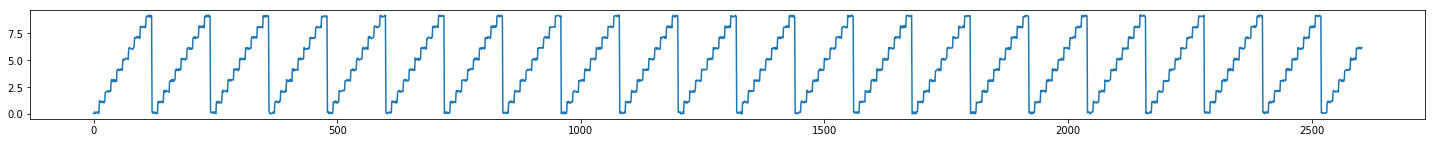

In [1]:
# pip install --no-cache-dir hmmlearn  
# cf)yFPE_jbuf 오류 발생시 설치방법
import numpy as np
from hmmlearn.hmm import GaussianHMM

data = np.loadtxt('./data/hmm_data.txt', delimiter=',')
X    = np.column_stack([data[:, 2]])
x    = [x[0] for x in X]

%matplotlib inline
import pandas as pd
pd.Series(x).plot(figsize=(25,2))

In [2]:
# 1. Create a Gaussian HMM
# 5 개의 Node를 갖고, 대각 공분산으로 구성
# algorithm = 'viterbi'

import warnings
warnings.filterwarnings("ignore")
num_components = 5
hmm = GaussianHMM(n_components    = num_components,
                  covariance_type = 'diag',
                  n_iter          = 100)
# 2. HMM 모델에 Train 데이터를 적용
hmm.fit(X)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=5, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [3]:
for i in range(hmm.n_components):
    print('''Hidden state {:2} -  Mean : {:.3f} \\ Variance : {:.3f}'''.format(
        i+1, hmm.means_[i][0], np.diag(hmm.covars_[i])[0]))    

Hidden state  1 -  Mean : 2.600 \ Variance : 0.259
Hidden state  2 -  Mean : 6.586 \ Variance : 0.253
Hidden state  3 -  Mean : 8.596 \ Variance : 0.260
Hidden state  4 -  Mean : 4.598 \ Variance : 0.252
Hidden state  5 -  Mean : 0.603 \ Variance : 0.253


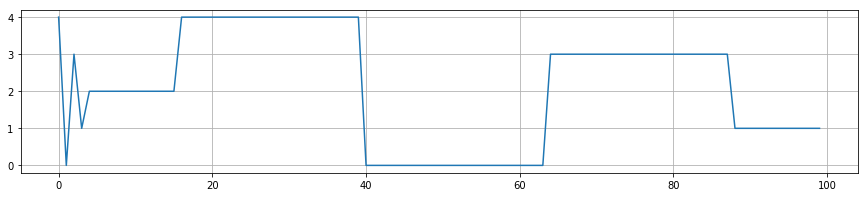

In [4]:
# 3. HMM 모델을 활용하여 예측데이터 생성하기
hidden_states = hmm.predict(X[-100:])
pd.Series(hidden_states).plot(figsize=(15,3), grid=True)

<br>
### **02 주가 데이터를 활용한 은닉 마르코프 모델 생성 (HMM)**
by Stock Price Data

! pip install git+https://github.com/pydata/pandas-datareader.git --upgrade

In [5]:
from pandas_datareader import get_data_yahoo
stock = get_data_yahoo('032830.KS', '2017-01-01')
stock.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-06-01,104000.0,102000.0,103000.0,102500.0,302214.0,102500.0
2018-06-04,104500.0,102500.0,103000.0,103000.0,215713.0,103000.0
2018-06-05,104500.0,103000.0,103000.0,103500.0,187418.0,103500.0


In [6]:
import numpy as np
price = stock.Close
price_array = np.asarray(price)
price_array.shape

(346,)

In [7]:
price_array = price_array.reshape(1, -1)
price_array.shape

(1, 346)

In [8]:
# 배열의 BroadCasting 연산을 위해서 1차원을 추가
price_array.T.shape

(346, 1)

In [9]:
# HMM 모델의 생성
# num_components : 데이터 예측범위가 0 ~ 10 사이의 값을 출력한다
num_components = 100
hmm            = GaussianHMM(n_components    = num_components,
                             covariance_type = 'diag',   
                             n_iter          = 1000)
# HMM 모델을 만든다 
hmm.fit(price_array.T)                                                

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=100, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

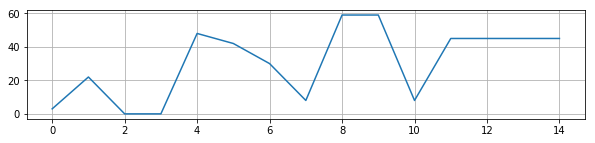

In [10]:
# HMM 모델을 활용하여 예측하기
hidden_states = hmm.predict(price_array.T[-15:])
pd.Series(hidden_states).plot(figsize=(10,2), grid=True)

In [11]:
# 미래의 데이터를 생성은 했지만
# 이를 검증하는 방법은 앞에서 다룬 과거 데이터 분석방법을 통해서만 가능하다